In [1]:
import pandas as pd 

 
df = pd.read_csv('housing.csv') # import the dataset

df.head(10) # quick look at the dataset 

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

In [2]:
# cleaning the data and prepar it 
# as we can see the columns ocean_proximity have spaces between the values 
set(df['ocean_proximity'])

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

In [3]:
# using pandas replace method and replac them with '_'
df['ocean_proximity'].replace(['NEAR BAY', '<1H OCEAN', 'NEAR OCEAN'], 
                                ['NEAR_BAY', '<1H_OCEAN', 'NEAR_OCEAN'], inplace=True)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR_BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR_BAY  
2       496.0       177.0         7.2574            352100.0        NEAR_BAY  
3       558.0       219.0         5.6431            341300.0        NEAR_BAY  
4       565.0       259.0         3.8462            342200.0        NEAR_BAY

In [4]:
# another problem this dataset have is missing values 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# as we can see each column is 20640 in length if we drop 207 row or replac them with the mode they would not
# have big impact on our model
df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [6]:
# columns total_bedrooms have 207 missing values 
df = df.dropna() 

In [7]:
df.to_csv('clean_housing_data.csv') # this is optional to create a new dataset after clean up the data

In [8]:
df = pd.read_csv('clean_housing_data.csv') # load the new datset

df.head()

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0           0    -122.23     37.88                41.0        880.0   
1           1    -122.22     37.86                21.0       7099.0   
2           2    -122.24     37.85                52.0       1467.0   
3           3    -122.25     37.85                52.0       1274.0   
4           4    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
2           190.0       496.0       177.0         7.2574            352100.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   

  ocean_proximity  
0        NEAR_BAY  
1        NEAR_BAY  
2        NEAR_BAY  
3        NEAR_BAY  
4        NEAR_BAY

In [9]:
# as we can see the dataset now is clean and ready to be used in our model
df.isnull().sum()

Unnamed: 0            0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


X = df[df.columns[0:-1]] # columns 0 to second last column contain non-class attributes 
y = df.ocean_proximity # store class lables in the variable y

# divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) # note we using %80 training size

In [11]:
print('Depth, Criteria, Accuracy_score')

criteria = ["entropy", "gini"]

for crt in criteria:
    for depth in range(1,10):
        rfc = RandomForestClassifier(max_depth=depth, criterion=crt, n_estimators=10) # create an instance od DecisionTreeClassifier
        rfc.fit(X_train, y_train) # train teh classifier on the training data to learn a model 
        y_predicted = rfc.predict(X_test) # used the learned model to predict class labels for test values
        accuracy = metrics.accuracy_score(y_test,y_predicted) # compute the accuracy score by comparing actual and predicted class labels
        print(depth, '    ', crt , '    ', str(accuracy))


Depth, Criteria, Accuracy_score
1      entropy      0.5563983361879129
2      entropy      0.733790066063127
3      entropy      0.7888426718864693
4      entropy      0.837778321507218
5      entropy      0.8837778321507218
6      entropy      0.8960117445559089
7      entropy      0.9067775874724737
8      entropy      0.9241497430878395
9      entropy      0.9405431857107903
1      gini      0.6143870809885001
2      gini      0.6892586249082456
3      gini      0.8000978712992415
4      gini      0.8275018350868608
5      gini      0.8534377293858576
6      gini      0.9062882309762662
7      gini      0.9197455346219721
8      gini      0.9491069243944213
9      gini      0.9410325422069978


In [12]:
# we can visulize at least one decision
# se we can create a test and see
est = rfc.estimators_[5]

y_predicted = rfc.predict(X_test)
accuracy = metrics.accuracy_score(y_test ,y_predicted)

print(accuracy) # this test have %98 accuracy

0.9410325422069978


In [13]:
est

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=662676866, splitter='best')

/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


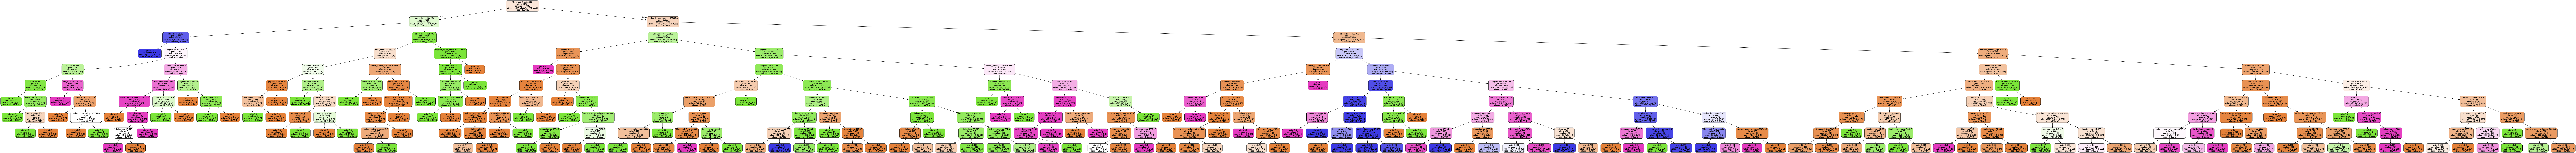

In [14]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  # note this packge do not come with anaconda you have to install it with pip
import pydotplus # note this packge do not come with anaconda you have to install it with pip

dot_data = StringIO()
export_graphviz(est, out_file=dot_data,  
                filled=True, rounded=True,
                proportion=False,feature_names = X.columns,class_names=list(set(y)))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('visualize_decision_Tree.png')
Image(graph.create_png()) 